In [1]:
import sys
sys.path.append('../..')
from trainer.downloader import Downloader

In [2]:
d = Downloader()

In [72]:
pkls = [d.download_pandas_game() for p in range(500)]

In [73]:
pkls[:5]

[None: None vs None (1:2),
 jstn: None vs None (2:4),
 None: None vs None (2:4),
 None: None vs None (2:3),
 wtf: None vs None (4:2)]

In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd

In [139]:
data_concat = pd.concat([pd.concat([pl.data for pl in p.players]) for p in pkls], sort=True)

/home/matthew/PycharmProjects/Saltie/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


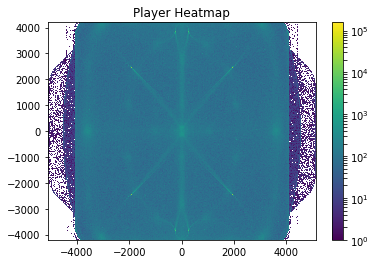

In [140]:
data = data_concat[(data_concat.pos_x != 0) & (data_concat.pos_y < 4200) & (data_concat.pos_y > -4200)]
count, bins, _, _ = plt.hist2d(data.pos_x, data.pos_y, bins=9 * 7 * 7, norm=LogNorm())#, vmin=1, vmax=1e4);
plt.title('Player Heatmap');

plt.colorbar();

In [190]:
ball_data = None
for game in pkls:
    passes = list(filter(lambda x: x.analytics['shot'], game.hits.values()))
    if passes == []:
        continue
    if ball_data is None:
        ball_data = pd.concat([p.ball_data for p in passes], axis=1)
    else:
        ball_data = pd.concat([ball_data, pd.concat([p.ball_data for p in passes], axis=1)], axis=1)
ball_data = ball_data.T

/home/matthew/PycharmProjects/Saltie/venv/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


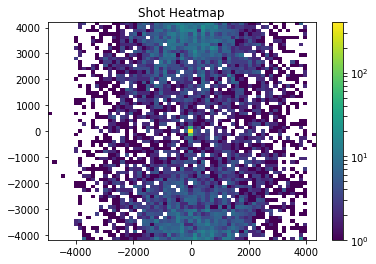

In [191]:
data = ball_data[(ball_data.pos_x != 0) & (ball_data.pos_y < 4200) & (ball_data.pos_y > -4200)]
count, bins, _, _ = plt.hist2d(data.pos_x, data.pos_y, bins=9 * 7, norm=LogNorm())#, vmin=1, vmax=1e4);
plt.title('Shot Heatmap');

plt.colorbar();

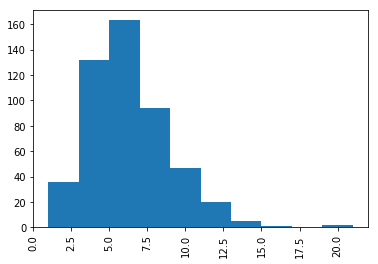

In [189]:
data = [len(p.goals) for p in pkls]
plt.hist(data, bins=10);
plt.tick_params(axis='x', rotation=90)